In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv("/content/scraped_data.csv")  # Update with the correct file path
df.head(20)



,Image,Category,Description,Sold as,Results,Fentanyl & Benzodiazepine Test,Notes,Location,Date
0,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Down,NaN,Fentanyl: PositiveBenzodiazepine: Negative,Notes: This sample presents the risk of a comp...,"Vancouver, BC",02/16/2025
1,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Down,NaN,Fentanyl: PositiveBenzodiazepine: Negative,Notes: The majority of the sample was erythrit...,"Vancouver, BC",02/16/2025
2,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Down,NaN,Fentanyl: PositiveBenzodiazepine: Negative,Notes: The fentanyl content in this sample is ...,"Vancouver, BC",01/03/2025
3,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Down,NaN,Fentanyl: PositiveBenzodiazepine: Negative,Notes: The fentanyl content in this sample is ...,"Vancouver, BC",01/03/2025
4,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Oxycodone,NaN,Fentanyl: PositiveBenzodiazepine: Positive,Notes: We were unable to identify oxycodone in...,"Vancouver, BC",12/31/2024
5,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Alprazolam,NaN,Fentanyl: PositiveBenzodiazepine: Positive,Notes: The uncertain match shares similarities...,"Vancouver, BC",12/31/2024
6,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Cocaine,NaN,Fentanyl: NegativeBenzodiazepine: Positive,Notes: The estimated cocaine content of this s...,"Montreal, QC",12/24/2024
7,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Down,NaN,Fentanyl: PositiveBenzodiazepine: Positive,"Notes: Due to the presence of fentanyl, benzod...","Vancouver, BC",12/23/2024
8,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Down,NaN,Fentanyl: PositiveBenzodiazepine: Positive,"Notes: \tDue to the presence of fentanyl, ben...","Vancouver, BC",12/23/2024
9,https://getyourdrugstested.com/wp-content/uplo...,Category:,Description:,Sold as: Hydromorphone,NaN,Fentanyl: NegativeBenzodiazepine: Positive,Notes:,"Vancouver, BC",12/22/2024


In [9]:
import pandas as pd

# Clean up column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Identify fentanyl and benzodiazepine presence from the 'Fentanyl & Benzodiazepine Test' column
df["fentanyl_positive"] = df["fentanyl_&_benzodiazepine_test"].str.contains("Fentanyl: Positive", case=False, na=False)
df["benzodiazepine_positive"] = df["fentanyl_&_benzodiazepine_test"].str.contains("Benzodiazepine: Positive", case=False, na=False)

# Group by drug type ('Sold as') and calculate the percentage of fentanyl and benzodiazepine presence
drug_contamination = df.groupby("sold_as")[["fentanyl_positive", "benzodiazepine_positive"]].mean() * 100

# Display the results
print(drug_contamination)


                                      fentanyl_positive  \
sold_as                                                   
Sold as: 2C-B                                100.000000   
Sold as: 2C-B HCl                             28.571429   
Sold as: 2C-I                                  0.000000   
Sold as: 3-HO-PCP                            100.000000   
Sold as: 3-MMC                                 0.000000   
Sold as: 4-MMC                               100.000000   
Sold as: Acetaminophen and Oxycodone          84.615385   
Sold as: Alprazolam                           60.000000   
Sold as: Amphetamine                           0.000000   
Sold as: Benzodiazepine (Unknown)            100.000000   
Sold as: Clonazepam                          100.000000   
Sold as: Cocaine                              50.000000   
Sold as: Cocaine Base                         57.142857   
Sold as: DMT                                 100.000000   
Sold as: Down                                 85.526316 

In [10]:
# Identify complex overdose risks (presence of multiple CNS depressants)
df["complex_overdose_risk"] = df["notes"].str.contains("complex overdose|won't fully respond to naloxone", case=False, na=False)

# Calculate percentage of complex overdose risks by drug type
complex_overdose_risk = df.groupby("sold_as")["complex_overdose_risk"].mean() * 100

# Display results
print(complex_overdose_risk)


sold_as
Sold as: 2C-B                             0.000000
Sold as: 2C-B HCl                         0.000000
Sold as: 2C-I                             0.000000
Sold as: 3-HO-PCP                         0.000000
Sold as: 3-MMC                            0.000000
Sold as: 4-MMC                            0.000000
Sold as: Acetaminophen and Oxycodone      7.692308
Sold as: Alprazolam                      26.666667
Sold as: Amphetamine                      0.000000
Sold as: Benzodiazepine (Unknown)       100.000000
Sold as: Clonazepam                       0.000000
Sold as: Cocaine                          0.000000
Sold as: Cocaine Base                    28.571429
Sold as: DMT                              0.000000
Sold as: Down                            38.157895
Sold as: Etizolam                         0.000000
Sold as: Fentanyl                        17.647059
Sold as: Flualprazolam                    0.000000
Sold as: Flubromazolam                    0.000000
Sold as: GHB           

In [11]:
# Identify unexpected drug compositions
df["misrepresented"] = df.apply(lambda row: row["sold_as"].lower() not in row["notes"].lower(), axis=1)

# Calculate percentage of misrepresented drugs by drug type
misrepresented = df.groupby("sold_as")["misrepresented"].mean() * 100

# Display results
print(misrepresented)


sold_as
Sold as: 2C-B                           100.0
Sold as: 2C-B HCl                       100.0
Sold as: 2C-I                           100.0
Sold as: 3-HO-PCP                       100.0
Sold as: 3-MMC                          100.0
Sold as: 4-MMC                          100.0
Sold as: Acetaminophen and Oxycodone    100.0
Sold as: Alprazolam                     100.0
Sold as: Amphetamine                    100.0
Sold as: Benzodiazepine (Unknown)       100.0
Sold as: Clonazepam                     100.0
Sold as: Cocaine                        100.0
Sold as: Cocaine Base                   100.0
Sold as: DMT                            100.0
Sold as: Down                           100.0
Sold as: Etizolam                       100.0
Sold as: Fentanyl                       100.0
Sold as: Flualprazolam                  100.0
Sold as: Flubromazolam                  100.0
Sold as: GHB                            100.0
Sold as: Heroin                         100.0
Sold as: Hydromorphone    

In [12]:
# Identify high-risk drug combinations by filtering for specific combinations (e.g., fentanyl + benzodiazepines)
high_risk_combinations = df[df["fentanyl_positive"] & df["benzodiazepine_positive"]]

# Count the frequency of these high-risk combinations by 'Sold as'
high_risk_count = high_risk_combinations['sold_as'].value_counts()

# Display the results
print(high_risk_count)


sold_as
Sold as: Down                           49
Sold as: Unknown                         9
Sold as: Oxycodone                       8
Sold as: Fentanyl                        7
Sold as: Heroin                          5
Sold as: Methamphetamine                 5
Sold as: Alprazolam                      2
Sold as: Cocaine Base                    2
Sold as: Cocaine                         2
Sold as: Flualprazolam                   2
Sold as: Benzodiazepine (Unknown)        1
Sold as: Hydromorphone                   1
Sold as: Acetaminophen and Oxycodone     1
Sold as: Clonazepam                      1
Name: count, dtype: int64


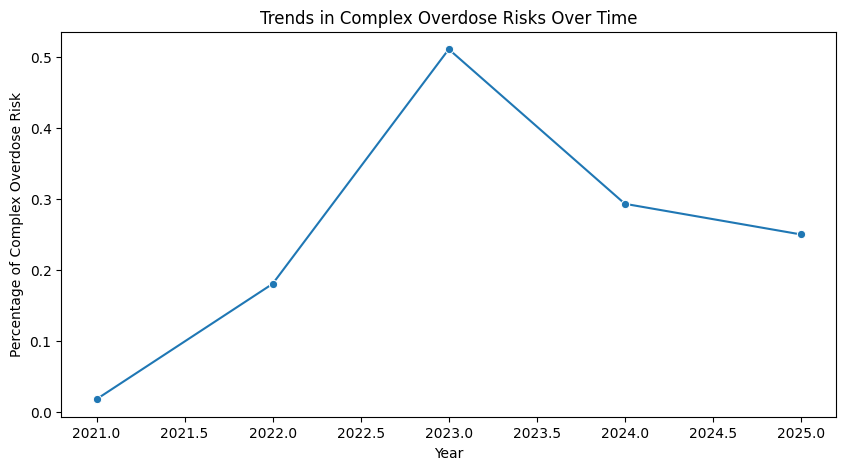

In [14]:
# Group by Date and check trends in complex overdose risk
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Plot complex overdose risk trends over the years
complex_overdose_trends = df.groupby('year')['complex_overdose_risk'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(data=complex_overdose_trends, x='year', y='complex_overdose_risk', marker='o')
plt.title('Trends in Complex Overdose Risks Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of Complex Overdose Risk')
plt.show()


In [15]:
# List of keywords related to complex overdoses
keywords = ["xylazine", "nitazene", "naloxone", "complex overdose", "seizures", "fentanyl"]

# Create a new column that flags notes with keywords related to overdose risks
df['high_risk_keywords'] = df['notes'].apply(lambda x: any(keyword.lower() in x.lower() for keyword in keywords))

# Calculate the percentage of notes containing high-risk keywords by drug type
keyword_risk = df.groupby('sold_as')['high_risk_keywords'].mean() * 100

# Display results
print(keyword_risk)


sold_as
Sold as: 2C-B                           100.000000
Sold as: 2C-B HCl                        28.571429
Sold as: 2C-I                             0.000000
Sold as: 3-HO-PCP                         0.000000
Sold as: 3-MMC                            0.000000
Sold as: 4-MMC                          100.000000
Sold as: Acetaminophen and Oxycodone     61.538462
Sold as: Alprazolam                      93.333333
Sold as: Amphetamine                      0.000000
Sold as: Benzodiazepine (Unknown)       100.000000
Sold as: Clonazepam                      50.000000
Sold as: Cocaine                         45.000000
Sold as: Cocaine Base                    57.142857
Sold as: DMT                              0.000000
Sold as: Down                            81.578947
Sold as: Etizolam                       100.000000
Sold as: Fentanyl                        82.352941
Sold as: Flualprazolam                   66.666667
Sold as: Flubromazolam                    0.000000
Sold as: GHB           